# **Generative Adversarial Network Python Implementation Using Keras with MNIST Dataset**

**Ganerative Adversarial Networks**

- GANs are a kind generative models designed by [Goodfellow et all in 2014.](https://arxiv.org/pdf/1406.2661)
- In a GAN setup, two differentiable functions, represented by neural networks The two neural networks, the generator and the discriminator, have different roles in this framework.
- The Generator takes random noise as input and generates synthetic samples that are intended to be similar to the real training data. The Generator typically consists of one or more deep neural networks, often using convolutional layers to generate images or recurrent layers to generate sequential data. The output of the Generator is fed to the Discriminator, which is then trained to distinguish between the generated samples and the real training data.
- The discriminator in GAN architecture serves as a deep neural network that distinguishes between real and fake images by generating a scalar value between 0 and 1, indicating the probability that the input is real.


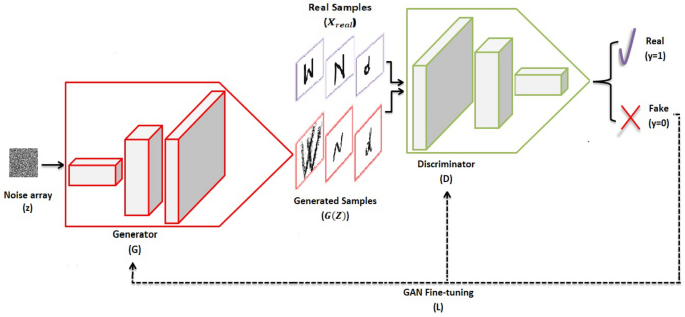

In [1]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to c:\users\harme\appdata\local\temp\pip-req-build-3y_2gw5t


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\harme\AppData\Local\Temp\pip-req-build-3y_2gw5t'
  error: RPC failed; curl 92 HTTP/2 stream 3 was not closed cleanly: CANCEL (err 8)
  error: 1257 bytes of body are still expected
  fetch-pack: unexpected disconnect while reading sideband packet
  fatal: early EOF
  fatal: fetch-pack: invalid index-pack output
  fatal: could not fetch 3ae87b238e001dd59d042826be8ce7b3c44fbfbd from promisor remote
  You can inspect what was checked out with 'git status'
  and retry with 'git restore --source=HEAD :/'

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\harme\AppData\Local\Temp\pip-req-build-3y_2gw5t' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filte

In [2]:
# import tensorflow library

import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
# loading the mnist dataset
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# summarize the shape of the dataset
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 129s 11us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


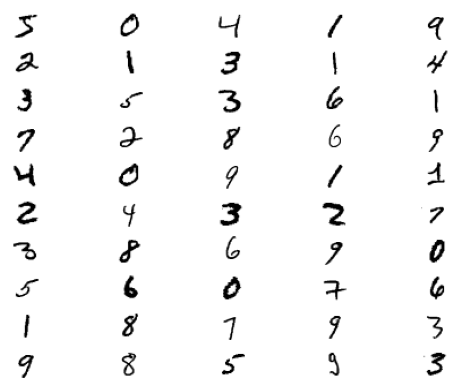

In [4]:
#plot of 50 images from the MNIST training dataset, arranged in a 10×5 square.

import matplotlib.pyplot as plt

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(train_images[i], cmap = 'gray_r')
    plt.axis('off')
plt.show()

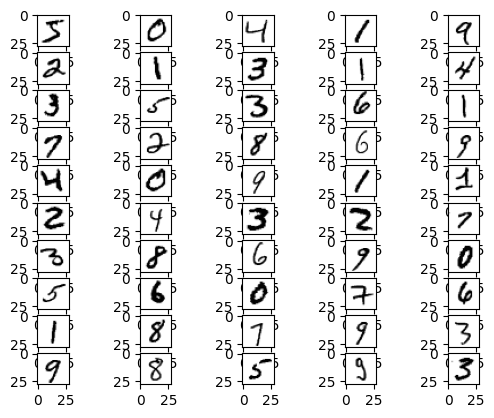

In [5]:
#plot of 50 images from the MNIST training dataset, arranged in a 10×5 square.

import matplotlib.pyplot as plt

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(train_images[i], cmap = 'gray_r')
    #plt.axis('off')
plt.show()


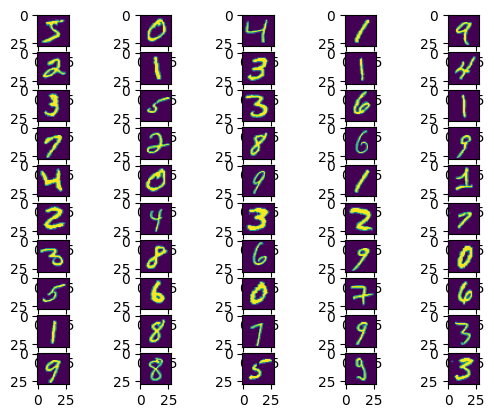

In [6]:
#plot of 50 images from the MNIST training dataset, arranged in a 10×5 square.

import matplotlib.pyplot as plt

for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(train_images[i])
    #plt.axis('off')
plt.show()

In [7]:
# Import required dependancies

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [8]:
# Loading MNIST datase to train Generator and Discriminator

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [9]:
# Reshape the images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

# Normalize the images to [-1, 1]
train_images = (train_images - 127.5) / 127.5

In [10]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [11]:
# Batch and shuffle the data
# This creates a tf.data.Dataset object from your train_images array (or tensor). Each element of train_images will become an individual element in the dataset.
# This shuffles the dataset. The BUFFER_SIZE specifies how many elements from the dataset are kept in memory for shuffling. A larger buffer size will result in better shuffling. However, using too large a size may consume more memory.
# his groups the dataset into batches of size BATCH_SIZE.

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# **The Generator**

In [12]:
# The generator uses tf.keras.layers.Conv2DTranspose (upsampling) layers to produce an image from a seed (random noise).
# This generator takes a vector of size 100 and first reshape that into (7, 7, 128) vector then applied transpose
# Input 7*7*256 (low resolution version of the output image)
# Outputs a single 28×28 grayscale image

# Here we need to upsample image --> input image is low resolution image --> target image is 28x28x1

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

c:\Users\harme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


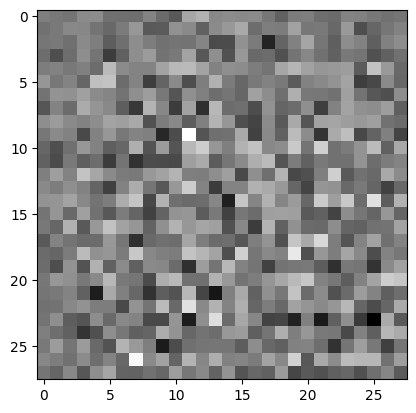

In [13]:
# Use the (as yet untrained) generator to create an image.

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

**The Discriminator**

The discriminator is a CNN-based image classifier.

In [16]:
# Input to discriminator = 28*28*1   grayscale image
# Output  binary prediction (image is real (class=1) or fake (class=0))
# single node in the output layer with the sigmoid activation function to predict whether the input sample is real or fake.
# Downsampling from 28×28 to 14×14, then to 7×7, before the model makes an output prediction

def make_discriminator_model():
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(32, (5,5), strides=(2, 2), padding='same',input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [17]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.49984792]], shape=(1, 1), dtype=float32)


**Define the loss and optimizers**

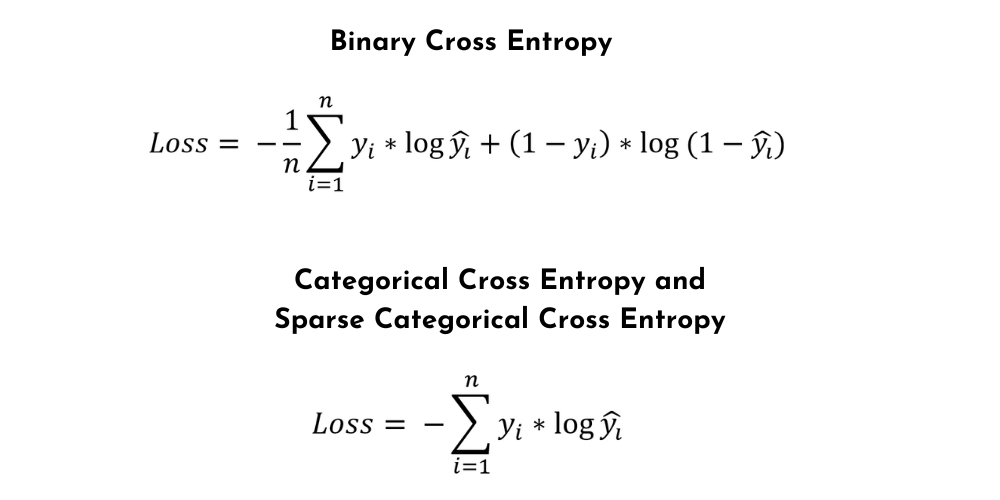

In [18]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

**Discriminator Loss Function**

In [19]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

**Generator Loss Function**

In [20]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

**The discriminator and the generator optimizers are different since you will train two networks separately.**

In [21]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

**Save checkpoints**

In [22]:
import os
import tensorflow as tf
from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

In [23]:
# Mount Google Drive
drive.mount('/content/drive')

NameError: name 'drive' is not defined

In [24]:
# Set up checkpoint directory
checkpoint_dir = '/content/drive/My Drive/training_checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

In [25]:
# Create a checkpoint object
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                  discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)

**Define the Trainning Loop**

In [26]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

The train_step function is a key part of the training process for a Generative Adversarial Network (GAN). It handles a single step of training for both the generator and the discriminator. Let's break down the code line by line to understand its components and functionality.

In [27]:
#This decorator compiles the function into a TensorFlow graph, which can optimize performance by reducing execution time. TensorFlow automatically converts the Python function into a graph representation, allowing for more efficient computation.
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [28]:
# The train function is designed to handle the training process for a Generative Adversarial Network (GAN) over a specified number of epochs.

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [29]:
# Generate Images

def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

**Train the model**

Call the train() method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

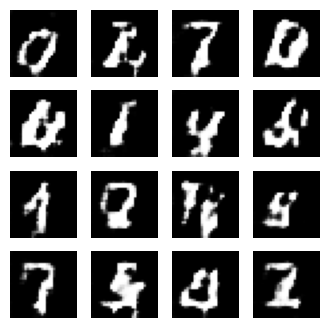

Time for epoch 17 is 337.45494389533997 sec


In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

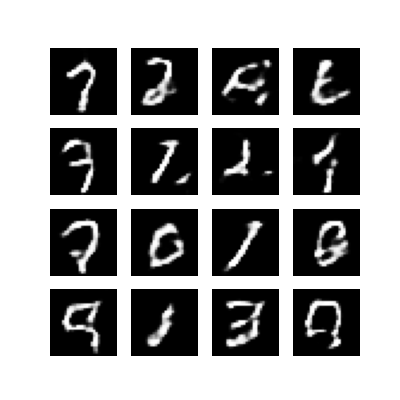

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-32-56bb6d34be2e>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-32-56bb6d34be2e>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



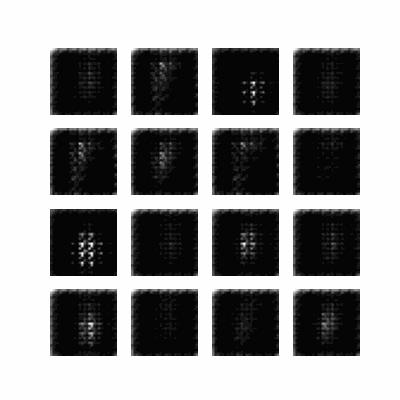

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)